# **Proyek Predictive Analytics: [Crop Recommendation Dataset]**

- **Nama** : Satria Dirgantara Nuryaman
- **Email** : satriadirgantaranuryaman15@gmail.com
- **ID Dicoding** : Satria Dirgantara Nuryaman 

## **Import Library**

In [2]:
# Data Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

# Data Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import time

# Model Machine Learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import label_binarize

# Model Tuning
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Warnings
import warnings 

# Configureations
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')

## **Data Loading**

In [3]:
# File path untuk menampung dataset
FILE_PATH = 'data/Crop_recommendation.csv'

# Load dataset ke DataFrame
df = pd.read_csv(FILE_PATH)

# Menampilkan 5 baris pertama dan terakhir dari DataFrame
display(df.head(), df.tail())

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


Dataset Crop Recommendation ini memiliki:
- 2200 baris.
- 8 fitur yang bernama **N (Nitrogen)**, **P (Phosphorous)**, **K (Potassium)**, **temperature**, **humidity**, **ph**, **rainfall**, dan **label**. 


## **Exploratory Data Analysis (EDA)**

### **Deskripsi Variable Dataset**


| Fitur        | Deskripsi                                      |
|--------------|------------------------------------------------|
| N            | Rasio kandungan Nitrogen dalam tanah           |
| P            | Rasio kandungan Phosphorous dalam tanah        |
| K            | Rasio kandungan Potassium dalam tanah          |
| temperature  | Suhu lingkungan (°C)                           |
| humidity     | Kelembapan relatif (%)                         |
| ph           | Nilai pH tanah                                 |
| rainfall     | Curah hujan (mm)                               |
| label        | Jenis tanaman yang direkomendasikan (target)   |

In [4]:
# Melihat informasi singkat dari DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


Seperti yang sudah di jelaskan dataset ini memiliki 2200 baris yang terdiri dari 8 Fitur yang berbeda beda tipe datanya:

- **temperature**, **humidity**, **ph**, dan **rainfall** bertipe data float64.
- **N (Nitrogen)**, **P (Phosphorous)**, dan **K (Potassium)** bertipe data float64.
- **label** bertipe data object.

Bisa kita lihat juga ternyata tidak ada missing values di dataset kita ini, inkonsistensi data juga tidak ada, semuanya sudah clean, tapi kita harus memastikan nya lagi.

In [5]:
# Melihat deskripsi statistik
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


Berdasarkan analisis deskriptif terhadap 2.200 sampel, ditemukan bahwa fitur fitur lingkungan dan tanah memiliki sebaran nilai yang cukup luas. 

- Unsur hara tanah seperti **nitrogen (N: 0 - 140 ppm)**, **fosfor (P: 5 - 145 ppm)**, dan **potassium (K: 5 - 205 ppm)** menunjukkan variasi yang signifikan, menandakan perbedaan kondisi tanah yang cukup ekstrem antar wilayah. 
- Kandungan kalium secara khusus dan ajaib memiliki standar deviasi tertinggi (**50.6**), menunjukkan keragaman yang besar dan kemungkinan peran pentingnya dalam penentuan jenis tanaman yang sesuai.
- Rata rata suhu sebesar **25.6 C** dengan rentang **8.8** - **43.7 C**, serta kelembapan **71.5%** (**14.3 - 99.9%**), mengindikasikan bahwa dataset ini mencakup berbagai kondisi iklim. pH tanah umumnya netral hingga sedikit asam/basa (rata rata **6.47**), dan curah hujan berkisar antara **20.2** - **298.6** mm, mendukung analisis untuk berbagai jenis tanaman yang tumbuh di lingkungan berbeda.

Dengan kondisi lingkungan yang seberagam ini, penting untuk tahu fitur mana saja yang benar benar berpengaruh terhadap pilihan tanaman. Ini bukan cuma penting untuk akurasi model, tapi juga bisa jadi pegangan nyata bagi petani dalam mengelola lahannya dengan lebih tepat.

### **Identifikasi Missing Values**

In [6]:
# Melihat missing values
missing_values = df.isnull().sum()
missing_values_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values' : missing_values,
    'Percentage' : missing_values_percentage
}) 

display(missing_df[missing_df['Missing Values'] > 0])

,Missing Values,Percentage


Ternyata benar informasi kita diatas, tidak ada nya missing values disini.

### **Identifikasi Duplicated Data**

In [7]:
# Melihat jumlah data yang terduplikasi
print(f'Jumlah data yang terduplikasi adalah {df.duplicated().sum()}')

Jumlah data yang terduplikasi adalah 0


Ternyata dataset Crop Recommendation sudah bersih, di buktikan dengan ketidakadaan nilai yang NaN dan juga duplikasi.

### **Univariate Analysis**

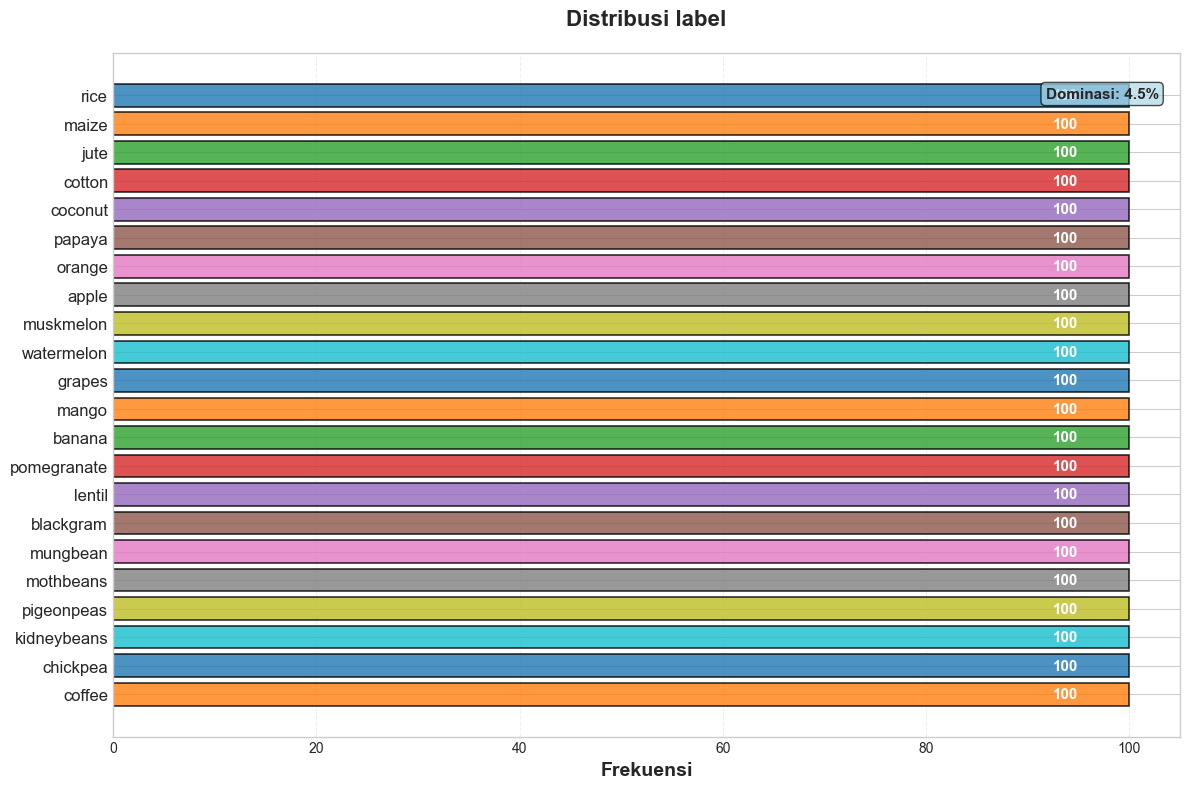

Summary Label Unique:
- Total kategori: 22
- Kategori dominan: rice (100 sampel - 4.5%)


In [8]:
# Visualisasi distribusi untuk fitur label
col = df.select_dtypes(include=['object']).columns[0]
plot_data = df[col].value_counts()

# Warna untuk setiap nilai unik
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Setup figure
fig, ax = plt.subplots(figsize=(12, 8))

# Horizontal bar chart
bars = ax.barh(
    plot_data.index,
    plot_data.values,
    color=colors[:len(plot_data)],
    edgecolor='black',
    linewidth=1.2,
    alpha=0.8
)

# Kustomisasi plot
ax.set_xlabel('Frekuensi', fontsize=14, fontweight='600')
ax.set_title(f'Distribusi {col}', fontsize=16, fontweight='bold', pad=20)
ax.set_yticklabels(plot_data.index, fontsize=12)
ax.invert_yaxis()
ax.grid(True, linestyle='--', alpha=0.3, axis='x')
ax.set_axisbelow(True)

# Annotasi nilai pada setiap bar
max_value = max(plot_data.values)
for bar, value in zip(bars, plot_data.values):
    width = bar.get_width()
    
    # Posisi dan style text berdasarkan lebar bar
    if width > max_value * 0.1:
        x_pos = width - (width * 0.05)
        ha, color_text, weight = 'right', 'white', 'bold'
    else:
        x_pos = width + (max_value * 0.01)
        ha, color_text, weight = 'left', 'black', 'normal'
    
    # Text annotation
    ax.text(x_pos, bar.get_y() + bar.get_height()/2,
            f'{int(value):,}',
            ha=ha, va='center',
            fontsize=11, fontweight=weight, color=color_text)

# Info dominasi kategori
top_pct = (plot_data.iloc[0] / len(df)) * 100
ax.text(0.98, 0.95, f'Dominasi: {top_pct:.1f}%',
        transform=ax.transAxes,
        ha='right', va='top',
        bbox=dict(boxstyle='round,pad=0.3', facecolor='lightblue', alpha=0.7),
        fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

# summary insights
print('Summary Label Unique:')
print(f'- Total kategori: {plot_data.shape[0]}')
print(f'- Kategori dominan: {plot_data.index[0]} ({plot_data.iloc[0]:,} sampel - {top_pct:.1f}%)')

Jika kita lihat dari visualisasi distribusi fitur kategorikal di atas dan juga ringkasan datanya, kita menemukan bahwa:

- **Label** terdiri dari **22 kategori komoditas pertanian** yang berbeda beda. Yang menarik adalah jumlah sampel dari setiap kategori sangat merata secara sempurna, dibuktikan dengan visualisasi yang menunjukkan masing masing kelas memiliki 100 sampel. Meskipun rice terlihat paling dominan, kontribusinya hanya 4.5% dari total data jadi tetap seimbang.

- Distribusi yang seimbang inilah yang menjadi pondasi ideal bagi model klasifikasi. Karena tidak ada ketimpangan antar kelas, maka tidak terjadi masalah imbalance data, sehingga model tidak cenderung bias ke satu kelas saja. Hal ini juga membuat metrik seperti akurasi menjadi lebih adil dan representatif, karena semua kelas diberi perlakuan yang setara.

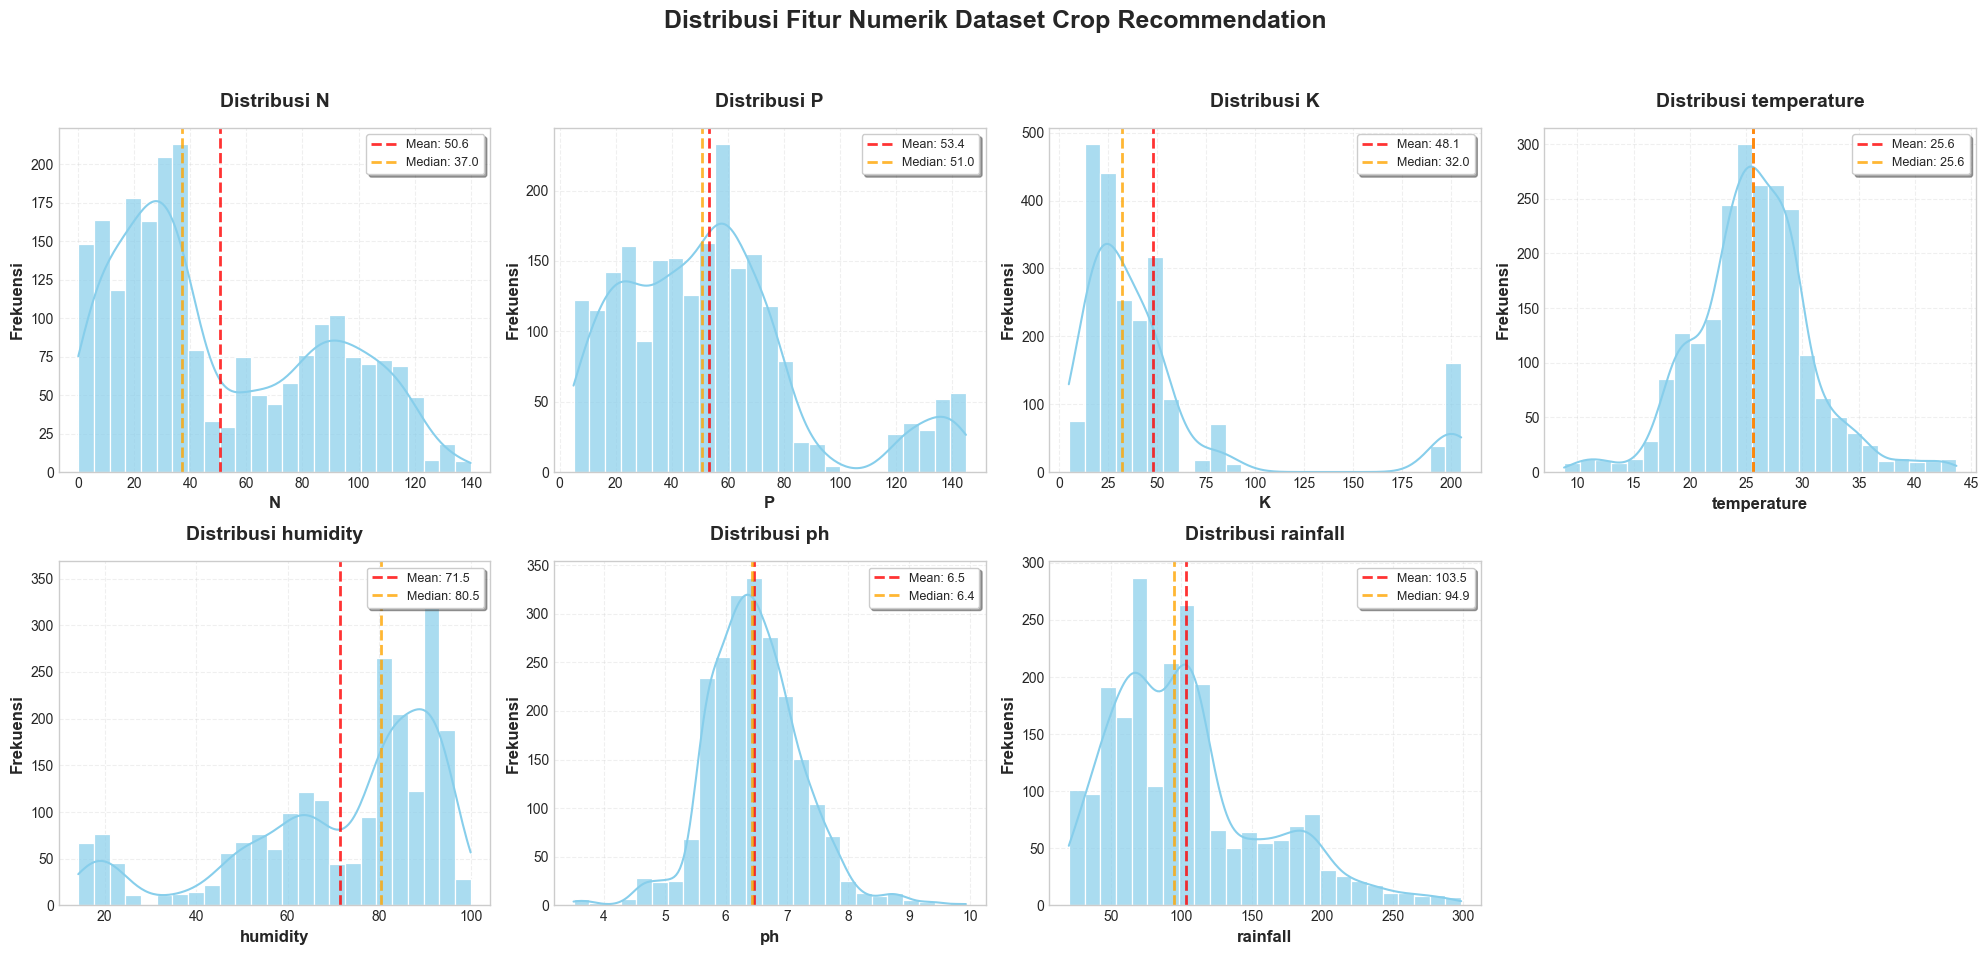

In [9]:
# Visualisasi Histogram untuk fitur numerik
num_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Setup Figure 
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

# Setup histogram
for i, feature in enumerate(num_features):
    sns.histplot(
        data=df, 
        x=feature, 
        bins=25, 
        kde=True, 
        ax=axes[i], 
        color='skyblue', 
        alpha=0.7,
        edgecolor='white',
    )
    
    # Styling untuk setiap subplot
    axes[i].set_title(f'Distribusi {feature}', fontsize=14, fontweight='bold', pad=15)
    axes[i].set_xlabel(feature, fontsize=12, fontweight='600')
    axes[i].set_ylabel('Frekuensi', fontsize=12, fontweight='600')
    
    # Grid untuk kemudahan membaca
    axes[i].grid(True, alpha=0.3, linestyle='--')
    axes[i].set_axisbelow(True)
    
    # Statistik deskriptif pada setiap plot
    mean_val = df[feature].mean()
    median_val = df[feature].median()
    
    # Garis vertikal untuk mean dan median
    axes[i].axvline(mean_val, color='red', linestyle='--', alpha=0.8, linewidth=2, label=f'Mean: {mean_val:.1f}')
    axes[i].axvline(median_val, color='orange', linestyle='--', alpha=0.8, linewidth=2, label=f'Median: {median_val:.1f}')
    
    # Legend untuk setiap subplot
    axes[i].legend(fontsize=9, loc='upper right', frameon=True, fancybox=True, shadow=True)
    
    # Formatting yang lebih rapi
    axes[i].tick_params(axis='both', which='major', labelsize=10)

# Hapus subplot yang tidak digunakan 
if len(num_features) < 8:
    for j in range(len(num_features), 8):
        fig.delaxes(axes[j])

# Overall title dan styling
plt.suptitle('Distribusi Fitur Numerik Dataset Crop Recommendation', fontsize=18, fontweight='bold', y=0.98)

# Spacing yang lebih baik
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Kita menemukan bahwa setiap distribusi tiap fitur memberikan gambaran tentang bentuk sebarannya. Kita menemukan beberapa hal yang menarik:

- **Nitrogen (N)** dan **Potassium (K)** memiliki **mean jauh lebih besar dari median**, mengindikasikan sebaran **miring ke kanan** (right-skewed). Artinya, sebagian besar nilai rendah, namun ada sejumlah kecil nilai yang sangat tinggi.
  
- Sebaliknya, pada **humidity**, justru **median lebih tinggi dari mean**, yang menunjukkan adanya kemiringan ke kiri (left-skewed). Ini berarti banyak data berada di sisi atas, tapi ada sebagian kecil nilai sangat rendah.

- Fitur seperti **temperature** dan **ph** menunjukkan **keseimbangan antara mean dan median**, menandakan distribusi mendekati normal. Hal ini menjadikan keduanya lebih stabil untuk pemodelan.

- **Rainfall** juga menunjukkan distribusi miring ke kanan, dengan cukup banyak nilai tinggi yang menjauh dari pusat sebaran.


### **Multivariate Analysis**

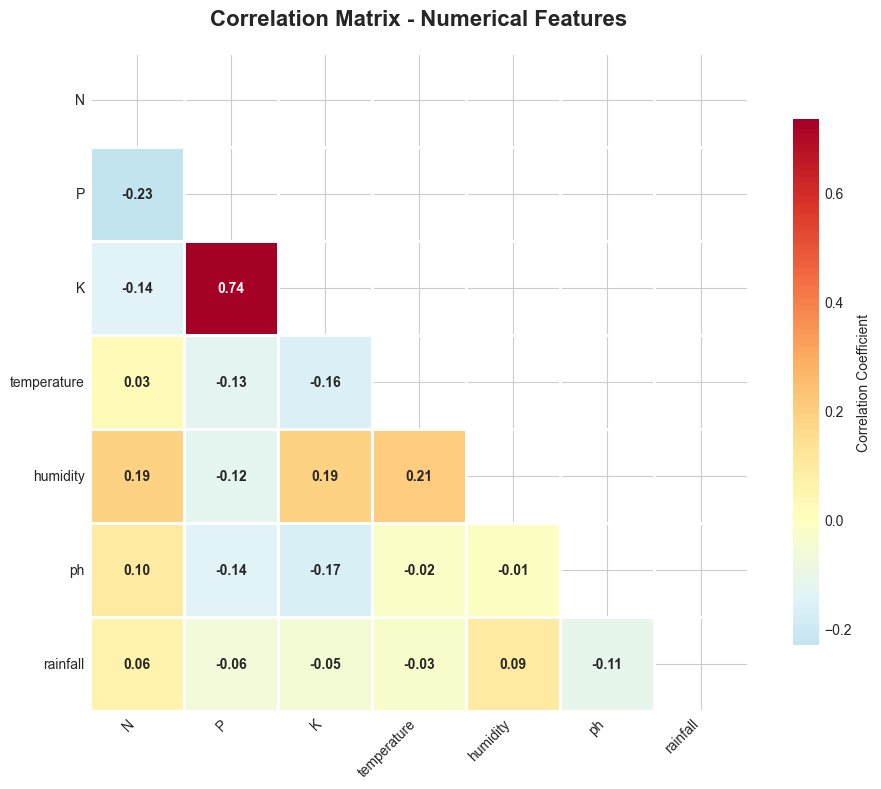

               CORRELATION INSIGHTS               

Significant Correlations (>= 0.3):
---------------------------------------------
           P <-> K            :  0.736 (Strong)

Summary:
- Total Fitur Yang Di Analisis: 21
- Korelasi Yang Signifikan Di Temukan: 1


In [10]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df[num_features].corr()

# Mask untuk menampilkan hanya bagian bawah segitiga
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Heatmap
sns.heatmap(
    corr_matrix, 
    mask=mask,
    annot=True, 
    fmt='.2f',
    cmap='RdYlBu_r',
    center=0,
    square=True, 
    linewidths=1,
    cbar_kws={
        'shrink': 0.8, 
        'label': 'Correlation Coefficient'
    },
    annot_kws={
        'fontsize': 10, 
        'fontweight': 'bold'
    }
)

# styling
plt.title('Correlation Matrix - Numerical Features', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

# insight analysis
print('=' * 50)
print('CORRELATION INSIGHTS'.center(50))
print('=' * 50)

# korelasi dengan threshold
threshold = 0.3
correlations = []

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) >= threshold:
            correlations.append({
                'feature1': corr_matrix.columns[i],
                'feature2': corr_matrix.columns[j], 
                'correlation': corr_val,
                'strength': 'Strong' if abs(corr_val) >= 0.7 else 'Moderate'
            })

if correlations:
    print(f'\nSignificant Correlations (>= {threshold}):')
    print('-' * 45)
    for item in sorted(correlations, key=lambda x: abs(x["correlation"]), reverse=True):
        print(f'{item["feature1"]:>12} <-> {item["feature2"]:<12} : {item["correlation"]:6.3f} ({item["strength"]})')
else:
    print(f'\Tidak Ada Korelasi Yang Signifikan (threshold: {threshold})')

# Summary 
print(f'\nSummary:')
print(f'- Total Fitur Yang Di Analisis: {len(corr_matrix.columns) * (len(corr_matrix.columns) - 1) // 2}')
print(f'- Korelasi Yang Signifikan Di Temukan: {len(correlations)}')

Di Visualisasi Korelasi di atas kita menmukan bahwa:
- Satu satunya korelasi signifikan yang terdeteksi adalah antara **Phosphorus (P)** dan **Potassium (K)**, dengan nilai sebesar **0.74**. Ini menunjukkan hubungan yang **kuat dan positif**, artinya saat kandungan P meningkat, K juga cenderung meningkat. Nah ini dapat dijelaskan secara kontekstual dalam dunia pertanian karena **P dan K adalah dua unsur hara makro yang umum diaplikasikan secara bersamaan dalam pupuk NPK** (Nitrogen Phosphorus Potassium). Oleh karena itu, tidak mengherankan jika kandungan keduanya saling berkorelasi secara alami dalam tanah yang diberi perlakuan pupuk serupa.

- Dari sisi analisis data, korelasi kuat ini berpotensi menyebabkan **redundansi fitur** saat digunakan sebagai input model prediktif. Jika tidak ditangani, model bisa memberi bobot berlebih pada dua fitur yang menyampaikan informasi serupa. Oleh karena itu, pada tahap preprocessing atau modeling, perlu dipertimbangkan teknik seperti:

    - **Feature selection** untuk memilih salah satu di antaranya.
    - **Regularisasi** untuk mengurangi dampak multikolinearitas.
    - **PCA** jika ingin mereduksi dimensi namun tetap mempertahankan informasi dominan.

Secara keseluruhan, korelasi ini menjadi sinyal penting bahwa **hubungan antar unsur dalam tanah bisa bersifat sistemik**, dan pemodelan harus memperhitungkan faktor faktor agronomis di balik angka.

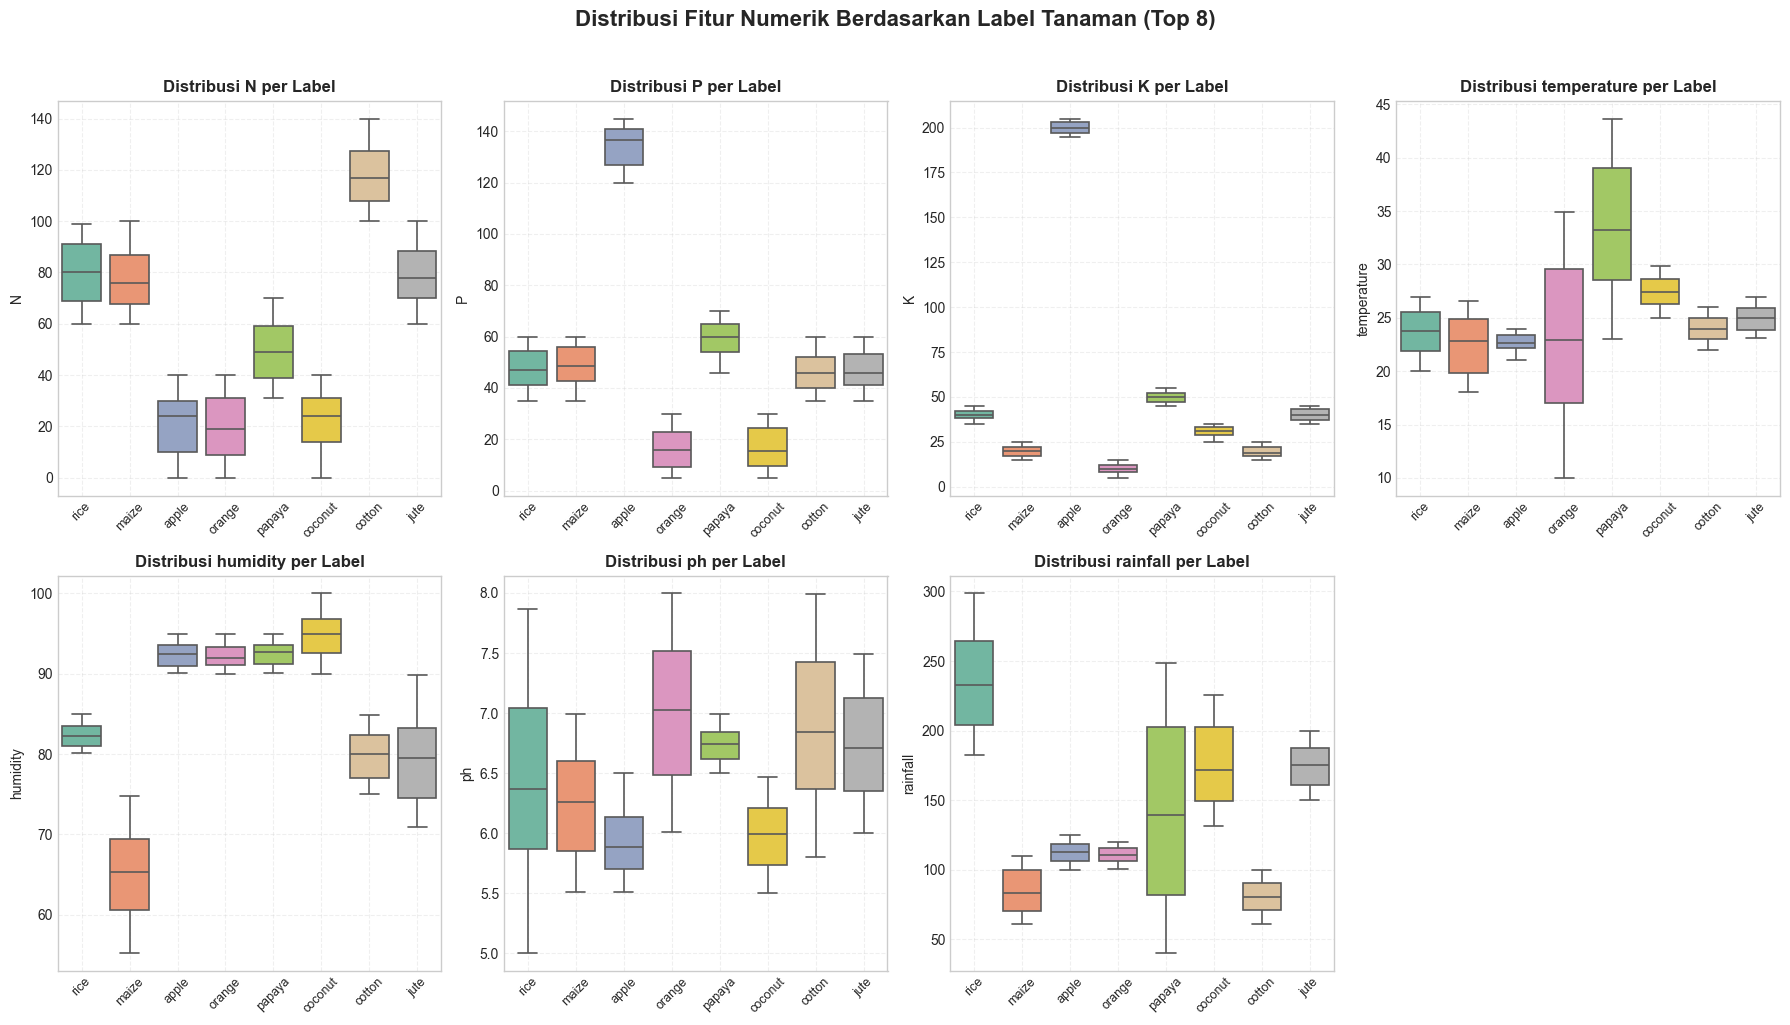

=== INSIGHT DISCRIMINATIVE FEATURES ===
Fitur yang menunjukkan variasi besar antar label:
 - N: Variasi rata rata = 11.78
 - P: Variasi rata rata = 7.71
 - K: Variasi rata rata = 3.11
 - temperature: Variasi rata rata = 2.86


In [11]:
# Distribusi fitur numerik berdasarkan label
fig, axes = plt.subplots(2, 4, figsize=(18, 10))
axes = axes.flatten()

# Subset label untuk readability (top 8)
top_labels = df['label'].value_counts().head(8).index
df_subset = df[df['label'].isin(top_labels)]

for i, feature in enumerate(num_features):
    sns.boxplot(data=df_subset, x='label', y=feature, ax=axes[i], 
                palette='Set2', linewidth=1.2)
    axes[i].set_title(f'Distribusi {feature} per Label', 
                      fontweight='bold', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45, labelsize=9)
    axes[i].grid(True, alpha=0.3, linestyle='--')
    axes[i].set_xlabel('')

# Menghapus axes yang tidak digunakan jika jumlah fitur kurang dari 8
if len(num_features) < 8:
    axes[7].set_visible(False)

plt.suptitle('Distribusi Fitur Numerik Berdasarkan Label Tanaman (Top 8)', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Insight analysis
print('=== INSIGHT DISCRIMINATIVE FEATURES ===')
print('Fitur yang menunjukkan variasi besar antar label:')
for feature in num_features[:4]:
    feature_var = df_subset.groupby('label')[feature].std().mean()
    print(f' - {feature}: Variasi rata rata = {feature_var:.2f}')

Berdasarkan distribusi fitur numerik pada delapan label tanaman teratas, terlihat bahwa **beberapa fitur memiliki perbedaan mencolok antar kelas**:

- **Nitrogen (N)** menunjukkan variasi terbesar. Misalnya, *cotton* cenderung memiliki nilai N yang tinggi, sementara *apple* dan *orange* lebih rendah.
- **Phosphorus (P)** dan **Potassium (K)** juga memperlihatkan pola khas, seperti nilai P yang tinggi pada *maize* dan nilai K yang sangat tinggi pada *rice*.
- **Temperature** menjadi pembeda alami untuk tanaman-tanaman yang tumbuh di iklim berbeda, seperti *orange* yang menyukai suhu tinggi dan *apple* yang cenderung lebih sejuk.

- Fitur fitur ini secara alami menjadi Sinyal bagi model untuk membedakan antar tanaman. Semakin besar variasi antar label, semakin kuat sinyalnya untuk klasifikasi. Jadi pada intinya **N, P, K, dan suhu** adalah fitur fitur dengan daya beda tinggi yang patut diprioritaskan dalam proses pemilihan fitur. Mereka bukan hanya numerik biasa, tapi membawa **jejak biologis** dan **karakteristik lingkungan** dari tiap tanaman, yang sangat berguna untuk meningkatkan performa model.

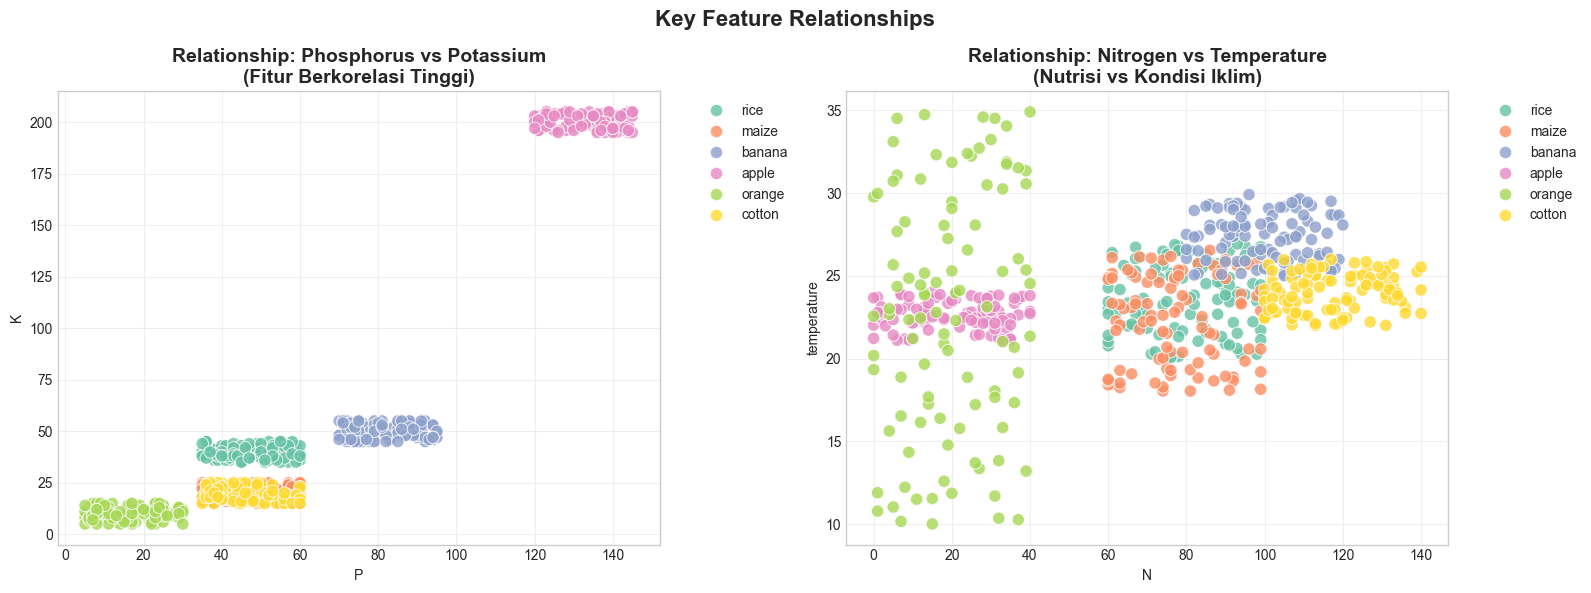

In [12]:
# Scatterplot 
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Subset ke 6-8 label saja untuk clarity
top_labels = ['rice', 'maize', 'cotton', 'apple', 'orange', 'banana']
df_focused = df[df['label'].isin(top_labels)]

# Plot 1: P vs K (Korelasi tinggi yang kita temukan)
sns.scatterplot(data=df_focused, x='P', y='K', hue='label', ax=axes[0], alpha=0.8, s=80, palette='Set2')
axes[0].set_title('Relationship: Phosphorus vs Potassium\n(Fitur Berkorelasi Tinggi)', 
                  fontweight='bold', fontsize=14)

# Plot 2: N vs Temperature (Nutrisi vs Iklim)
sns.scatterplot(data=df_focused, x='N', y='temperature', hue='label', ax=axes[1], alpha=0.8, s=80, palette='Set2')
axes[1].set_title('Relationship: Nitrogen vs Temperature\n(Nutrisi vs Kondisi Iklim)', 
                  fontweight='bold', fontsize=14)

for ax in axes:
    ax.grid(True, alpha=0.3)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

plt.suptitle('Key Feature Relationships', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Scatterplot ini menunjukkan bahwa kombinasi fitur seperti **Phosphorus (P)**, **Potassium (K)**, **Nitrogen (N)**, dan **temperature** mampu membentuk pola pemisahan yang cukup rapi antar tanaman:

- Pada **P vs K**, terlihat jelas bahwa *apple*, *banana*, dan *rice* menempati zona yang sangat berbeda. Ini mengindikasikan bahwa kebutuhan unsur hara tiap tanaman cukup khas, dan sangat berguna untuk membedakan mereka.
- Pada **N vs temperature**, tanaman seperti *cotton* terlihat dominan pada N tinggi, sementara *orange* lebih menyebar pada suhu tinggi namun N-nya lebih rendah. Ini menandakan interaksi unik antara nutrisi dan iklim.

Secara keseluruhan, visualisasi ini mempertegas bahwa fitur **N, P, K, dan suhu** bukan hanya penting, tapi juga secara alami membantu membentuk **pemisahan antar kelas**, memudahkan model dalam belajar dan mengambil keputusan klasifikasi yang akurat.

Melakukan pairplot untuk 6 label teratas: ['rice', 'maize', 'jute', 'cotton', 'coconut', 'papaya']
Total sampel yang dianalisis: 600 dari 2200 total data


<Figure size 1500x1500 with 0 Axes>

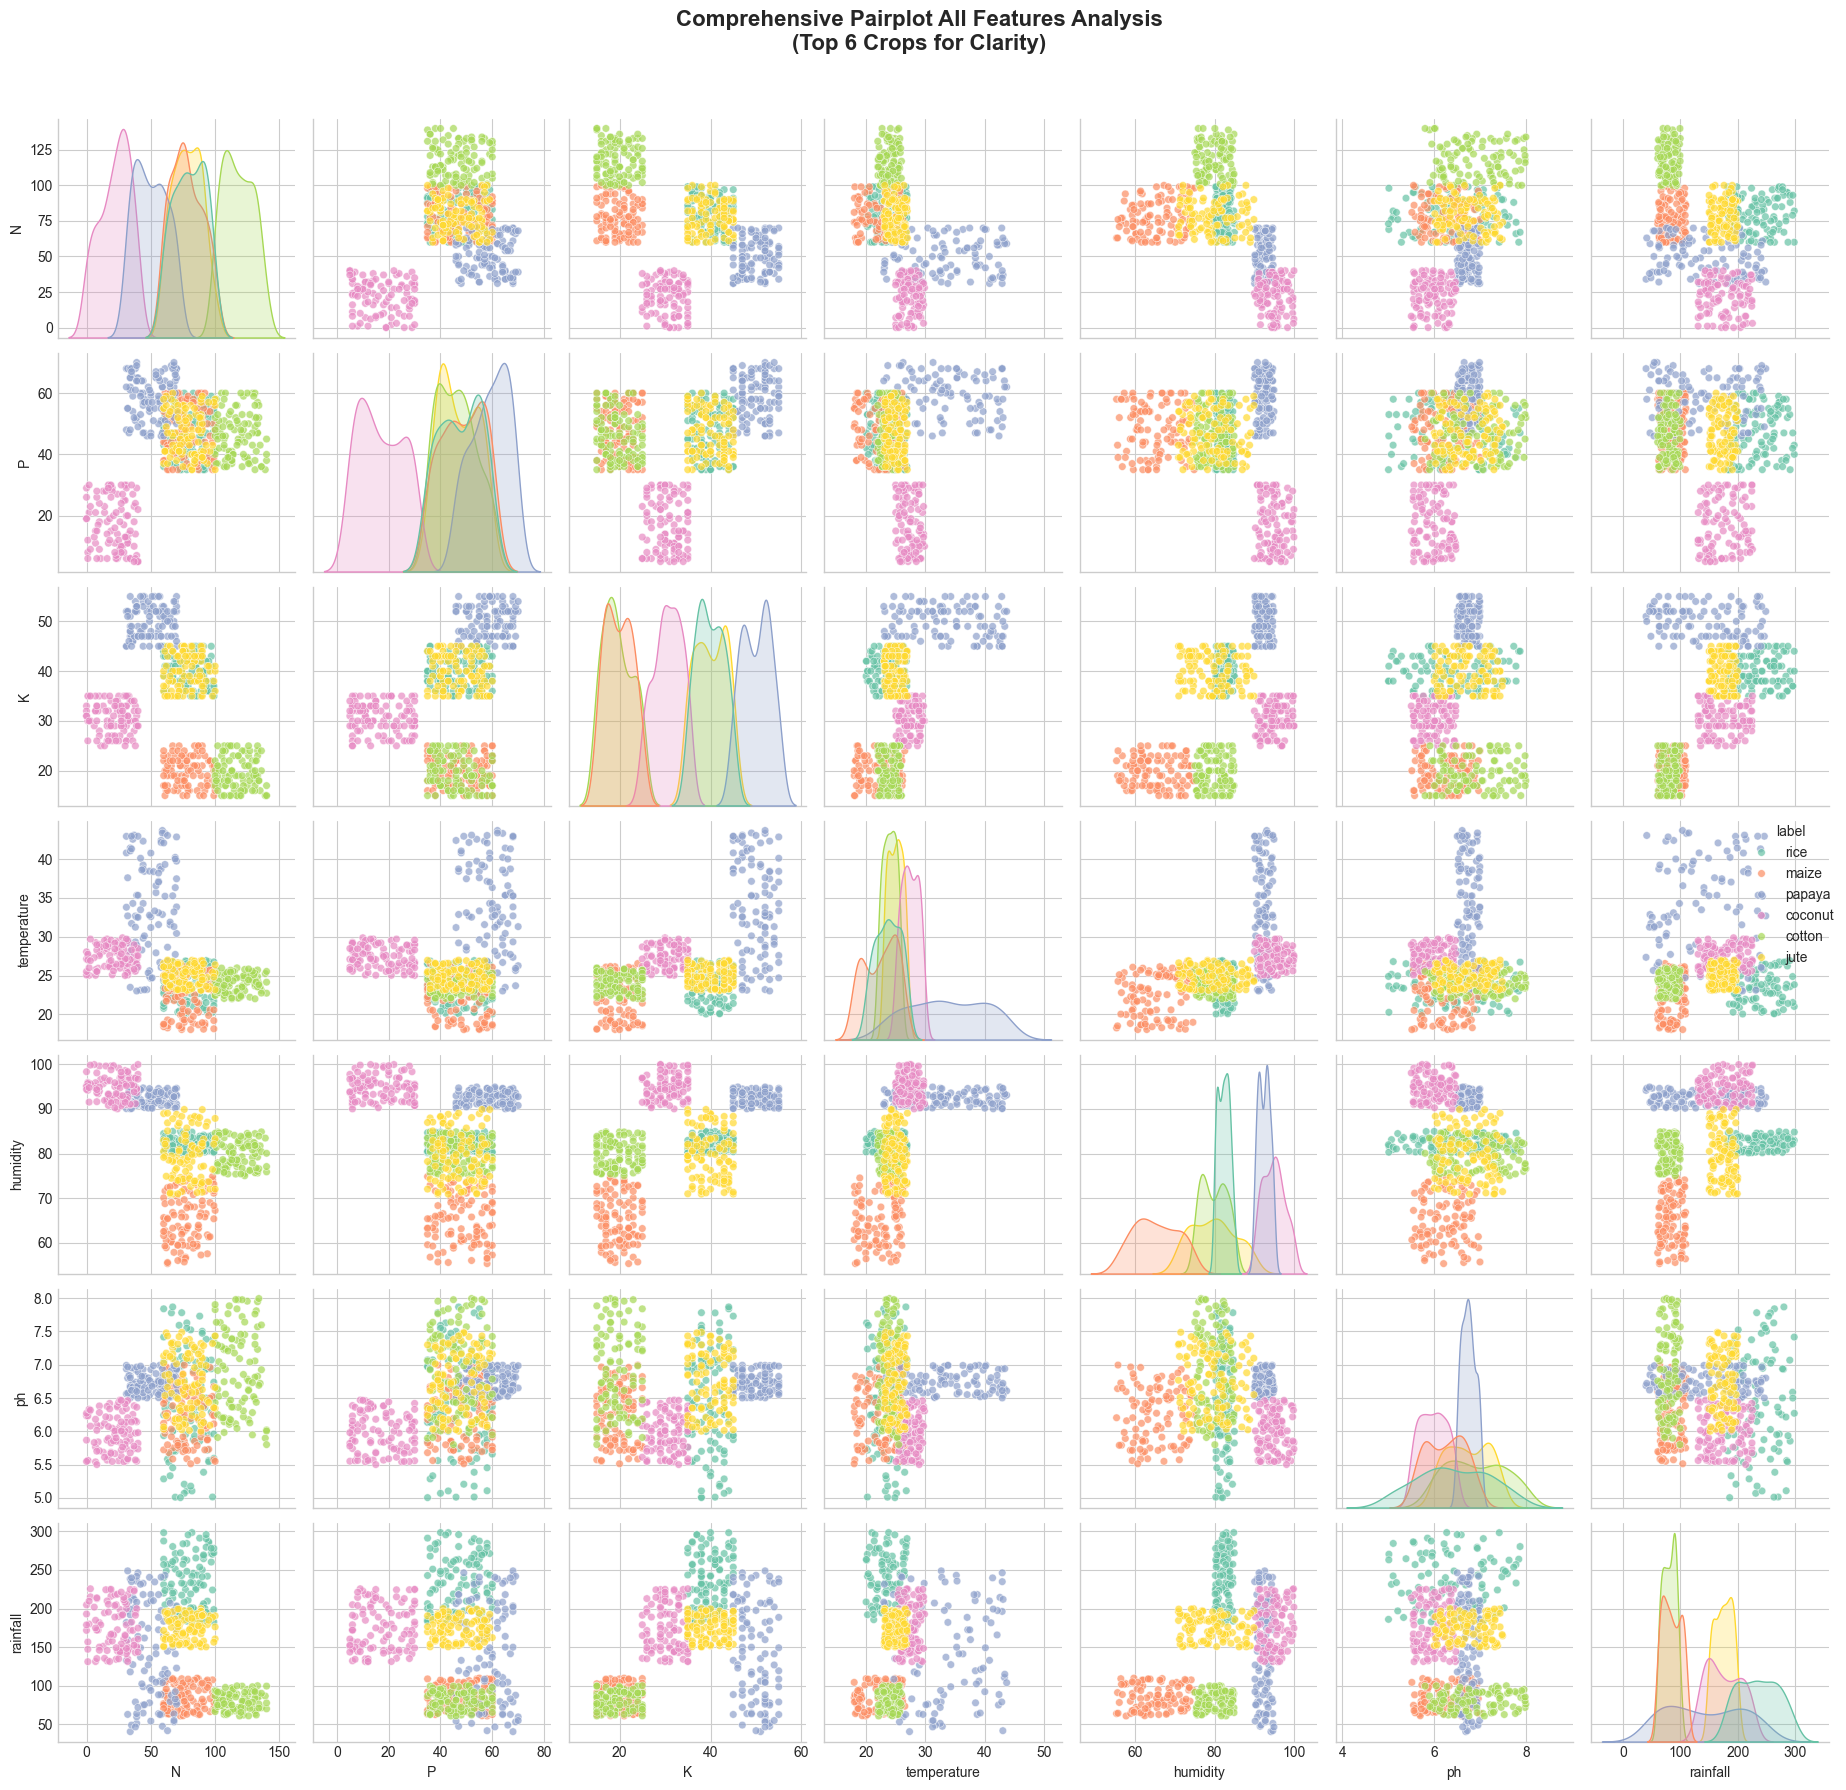

In [13]:
# Pairplot semua fitur tapi hanya 6 label teratas untuk clarity
top_labels = df['label'].value_counts().head(6).index
df_focused = df[df['label'].isin(top_labels)]

print(f'Melakukan pairplot untuk {len(top_labels)} label teratas: {list(top_labels)}')
print(f'Total sampel yang dianalisis: {len(df_focused)} dari {len(df)} total data')

# Pairplot
plt.figure(figsize=(15, 15))
sns.pairplot(df_focused[num_features + ['label']], 
             hue='label', palette='Set2', diag_kind='kde', 
             plot_kws={'alpha': 0.7, 's': 30})
plt.suptitle('Comprehensive Pairplot All Features Analysis\n(Top 6 Crops for Clarity)', 
             y=1.02, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Terbukti:
- Pairplot di atas semakin menegaskan bahwa **N (Nitrogen), P (Phosphorus), K (Potassium), dan temperature** adalah fitur utama yang paling kuat dalam membedakan jenis tanaman. Keempat fitur ini membentuk cluster yang jelas antar label, sehingga sangat membantu proses klasifikasi.

- Walaupun fitur pendukung seperti **humidity, pH, dan rainfall** tidak sekuat fitur utama, mereka tetap memberikan tambahan informasi yang bisa membantu model, terutama untuk membedakan tanaman dengan kebutuhan lingkungan khusus. Jadi, kombinasi semua fitur tetap bermanfaat untuk hasil prediksi klasifikasi.

## **Data Preparation**

### **Train Test Split**

In [14]:
# Membagi dataset menjadi fitur (X) dan label (y)
X = df.drop(columns=['label'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f'Jumlah data latih: {len(X_train)} ({len(X_train)/len(df)*100:.1f}%)')
print(f'Jumlah data uji: {len(X_test)} ({len(X_test)/len(df)*100:.1f}%)')
print(f'Jumlah fitur: {X_train.shape[1]}')
print(f'Jumlah kelas unik: {len(np.unique(y_train))}')


Jumlah data latih: 1760 (80.0%)
Jumlah data uji: 440 (20.0%)
Jumlah fitur: 7
Jumlah kelas unik: 22


### **Encoding Fitur Kategorik**

In [15]:
# Inisialisasi LabelEncoder untuk mengubah label menjadi numerik
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

print(f'\nLabel encoding mapping (contoh):')
print(f'Original: {y_train.iloc[:3].tolist()}')
print(f'Encoded: {y_train_enc[:3].tolist()}')


Label encoding mapping (contoh):
Original: ['orange', 'grapes', 'kidneybeans']
Encoded: [16, 7, 9]


### **Standarisasi**

In [16]:
# Inisialisasi StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f'\nFitur sebelum scaling (mean, std):')
print(f'N: {X_train["N"].mean():.2f}, {X_train["N"].std():.2f}')
print(f'\nFitur setelah scaling (mean, std):')
print(f'N: {X_train_scaled[:, 0].mean():.2f}, {X_train_scaled[:, 0].std():.2f}')


Fitur sebelum scaling (mean, std):
N: 50.55, 36.86

Fitur setelah scaling (mean, std):
N: 0.00, 1.00


## **Model Development**

### **Finding the best parameters**

In [17]:
# Setup Parameter Grid
param_grid = {
    'KNeighborsClassifier': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9, 11],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }
    },
    'RandomForestClassifier': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [10, 20, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'XGBClassifier': {
        'model': xgb.XGBClassifier(random_state=42, eval_metric='mlogloss'),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 6, 10],
            'learning_rate': [0.01, 0.1, 0.2],
            'subsample': [0.8, 1.0]
        }
    }
}

# GridSearch untuk setiap model
grid_results = {}

print('Memulai GridSearch untuk optimasi hyperparameter...')
print('='*60)

for name, config in param_grid.items():
    print(f'\n[{name}]')
    print('-' * 40)
    start_time = time.time()
    
    grid = GridSearchCV(
        estimator=config['model'], 
        param_grid=config['params'], 
        cv=5, 
        scoring='accuracy',
        n_jobs=-1, 
        verbose=0
    )
    
    grid.fit(X_train_scaled, y_train_enc)
    
    grid_results[name] = {
        'best_model': grid.best_estimator_,
        'best_score': grid.best_score_,
        'best_params': grid.best_params_,
        'training_time': time.time() - start_time
    }
    
    # Menampilkan hasil GridSearch
    print(f'Best CV Score: {grid.best_score_:.4f}')
    print(f'Training Time: {grid_results[name]["training_time"]:.2f}s')
    print(f'Best Parameters:')
    for param, value in grid.best_params_.items():
        print(f'  - {param}: {value}')

best_params_list = []
for name, result in grid_results.items():
    params = result['best_params']
    params_str = ', '.join([f"{k}={v}" for k, v in params.items()])
    best_params_list.append({
        'Model': name.replace('Classifier', ''),
        'Best Params': params_str
    })

best_params_df = pd.DataFrame(best_params_list)
display(best_params_df)

Memulai GridSearch untuk optimasi hyperparameter...

[KNeighborsClassifier]
----------------------------------------
Best CV Score: 0.9812
Training Time: 1.46s
Best Parameters:
  - metric: manhattan
  - n_neighbors: 5
  - weights: distance

[RandomForestClassifier]
----------------------------------------
Best CV Score: 0.9960
Training Time: 12.58s
Best Parameters:
  - max_depth: 10
  - min_samples_leaf: 1
  - min_samples_split: 5
  - n_estimators: 100

[XGBClassifier]
----------------------------------------
Best CV Score: 0.9915
Training Time: 11.78s
Best Parameters:
  - learning_rate: 0.1
  - max_depth: 3
  - n_estimators: 200
  - subsample: 0.8


,Model,Best Params
0,KNeighbors,"metric=manhattan, n_neighbors=5, weights=distance"
1,RandomForest,"max_depth=10, min_samples_leaf=1, min_samples_..."
2,XGB,"learning_rate=0.1, max_depth=3, n_estimators=2..."


Kita menemukan bahwa:
- Hasil dari GridSearch menunjukkan semua model memiliki performa validasi silang yang sangat tinggi, dengan Random Forest menjadi yang terbaik (CV Score 0.9960). 
- Setiap model memiliki kombinasi hyperparameter optimal yang berbeda, misalnya: 
 - KNeighborsClassifier paling optimal dengan  `metric = manhattan`,  `n_neighbors = 5`, dan `weights = distance`.
 - Random Forest paling optimal dengan `max_depth = 10`, `n_estimators = 100`, `min_samples_leaf = 1`, dan `min_samples_split = 5`.
 - sedangkan XGBoost dengan `max_depth = 3`, `learning_rate = 0.1`, `n_estimators = 200`, dan `subsample = 0.8`.


### **Evaluasi Model**

In [ ]:
# Mengambil model terbaik
best_model = evaluation_results[best_model_name]['model']
best_y_pred = evaluation_results[best_model_name]['y_pred']

# Binarize labels untuk multi-class ROC
y_test_bin = label_binarize(y_test_enc, classes=range(len(le.classes_)))
y_score = best_model.predict_proba(X_test_scaled)

# Plot ROC Curve untuk setiap kelas
plt.figure(figsize=(15, 10))

# ROC untuk setiap kelas
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(le.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.subplot(2, 2, 1)
for i in range(min(5, len(le.classes_))):  # Top 5 classes
    plt.plot(fpr[i], tpr[i], 
             label=f'{le.classes_[i]} (AUC = {roc_auc[i]:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Top 5 Classes')
plt.legend()
plt.grid(True, alpha=0.3)

# Precision-Recall Curve
plt.subplot(2, 2, 2)
for i in range(min(5, len(le.classes_))):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    plt.plot(recall, precision, 
             label=f'{le.classes_[i]}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves - Top 5 Classes')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Average ROC-AUC
print(f'Average ROC-AUC: {np.mean(list(roc_auc.values())):.4f}')

NameError: name 'best_model' is not defined

Dari Evaluasi diatas kita menemukan bahwa:
- Semua model (KNN, Random Forest, XGBoost) menunjukkan akurasi, precision, recall, dan f1-score di atas 98%, serta overfitting sangat kecil (<0.01).
- Random Forest menjadi model terbaik dengan test accuracy 0.9955 dan overfitting 0.0006, membuktikan model sangat stabil dan andal pada data baru.
- XGBoost dan KNN juga sangat kompetitif, tapi masih sedikit di bawah Random Forest.
Tidak ada model yang overfitting, semua mampu generalisasi dengan baik.


Hasil evaluasi mendalam menunjukkan bahwa Random Forest tidak hanya unggul secara angka, tetapi juga sangat stabil dan minim overfitting. Akurasi, precision, recall, dan f1-score yang hampir sempurna di seluruh kelas membuktikan model mampu mengenali pola setiap jenis tanaman dengan sangat baik, bahkan pada data yang belum pernah dilihat sebelumnya. Confusion matrix juga memperlihatkan prediksi yang hampir selalu tepat di semua kelas, tanpa bias ke kelas tertentu.

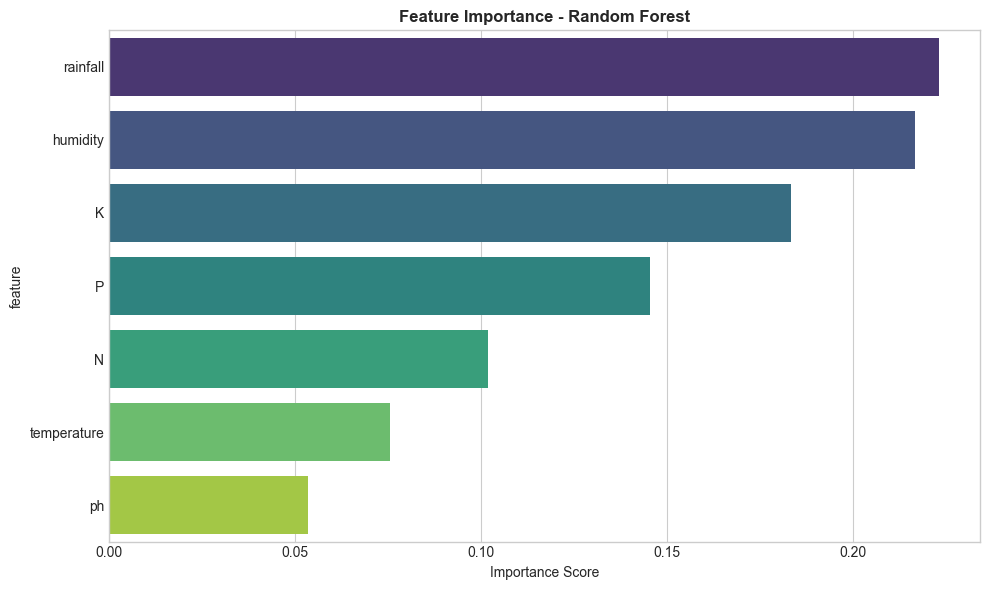

Top 3 fitur paling berpengaruh:
1. rainfall: 0.2231
2. humidity: 0.2169
3. K: 0.1834


In [ ]:
# Feature importance untuk Best Model Kita
feature_importance = best_model.feature_importances_
features = X.columns

importance_df = pd.DataFrame({
    'feature': features,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='importance', y='feature', palette='viridis')
plt.title('Feature Importance - Random Forest', fontweight='bold')
plt.xlabel('Importance Score')

plt.tight_layout()
plt.show()

print('Top 3 fitur paling berpengaruh:')
for i, (feat, imp) in enumerate(importance_df.head(3).values):
    print(f'{i+1}. {feat}: {imp:.4f}')

Disini ada suatu hal yang mencengangkan kalau kita melihat visualisasi di atas:
- Meski di proses EDA awal kita  menyoroti **N, P, K**, dan **suhu** sebagai fitur pembeda atau the best fitur yang ada di dataset ini, tapi hasil feature importance dari Random Forest justru menempatkan **rainfall** dan **humidity** di posisi teratas.

- Hal ini menunjukkan bahwa model berhasil menangkap pola tersembunyi di mana variasi curah hujan dan kelembapan ternyata sangat menentukan kebutuhan tanaman. Dua fitur ini, yang awalnya terlihat pendukung, justru menjadi fondasi prediksi yang kuat.

Temuan ini jadi pengingat intuisi domain memang penting, tapi insight dari model bisa membuka perspektif baru yang kadang luput dari pandangan awal.

## **Testing Model**

In [ ]:
# Validasi dengan sample data test set
print('\n' + '='*60)
print('VALIDASI DENGAN SAMPLE DATA TEST SET')
print('='*60)

sample_indices = [0, 50, 100, 150, 200]  # 5 sample berbeda
print(f'Mengambil {len(sample_indices)} sample dari test set untuk validasi:\n')

for i, idx in enumerate(sample_indices):
    # Data aktual
    actual_features = X_test.iloc[idx].values
    actual_label = y_test.iloc[idx]
    
    # Scaling fitur
    features_scaled = scaler.transform([actual_features])
    # Prediksi probabilitas
    probs = best_model.predict_proba(features_scaled)[0]
    pred_idx = np.argmax(probs)
    pred_label = le.inverse_transform([pred_idx])[0]
    confidence = probs[pred_idx]
    
    status = 'BENAR' if pred_label == actual_label else 'SALAH'
    
    print(f'Sample {i+1}:')
    print(f'  Input: N={actual_features[0]:.1f}, P={actual_features[1]:.1f}, K={actual_features[2]:.1f}, Temp={actual_features[3]:.1f} C')
    print(f'  Aktual: {actual_label}')
    print(f'  Prediksi: {pred_label}')
    print(f'  Confidence: {confidence:.4f} ({confidence*100:.1f}%)')
    print(f'  Status: {status}\n')


VALIDASI DENGAN SAMPLE DATA TEST SET
Mengambil 5 sample dari test set untuk validasi:

Sample 1:
  Input: N=13.0, P=23.0, K=6.0, Temp=24.0 C
  Aktual: orange
  Prediksi: orange
  Confidence: 0.9497 (95.0%)
  Status: BENAR

Sample 2:
  Input: N=65.0, P=62.0, K=51.0, Temp=31.5 C
  Aktual: papaya
  Prediksi: papaya
  Confidence: 0.8636 (86.4%)
  Status: BENAR

Sample 3:
  Input: N=106.0, P=16.0, K=54.0, Temp=29.0 C
  Aktual: muskmelon
  Prediksi: muskmelon
  Confidence: 1.0000 (100.0%)
  Status: BENAR

Sample 4:
  Input: N=81.0, P=49.0, K=20.0, Temp=18.0 C
  Aktual: maize
  Prediksi: maize
  Confidence: 0.9756 (97.6%)
  Status: BENAR

Sample 5:
  Input: N=7.0, P=11.0, K=32.0, Temp=29.3 C
  Aktual: coconut
  Prediksi: coconut
  Confidence: 1.0000 (100.0%)
  Status: BENAR



Perfecto

- Model berhasil memprediksi **semua sampel dengan benar** pada data test set acak.
- **Confidence score** untuk setiap prediksi sangat tinggi (mayoritas di atas 95%), menandakan model sangat yakin terhadap keputusannya.
- Hasil ini membuktikan model tidak hanya unggul pada metrik evaluasi umum, tetapi juga **sangat andal saat diuji pada data baru** yang belum pernah dilihat sebelumnya.
- Prediksi yang tepat pada berbagai kombinasi fitur menunjukkan model benar benar memahami hubungan antara kondisi tanah/iklim dan jenis tanaman yang optimal.
- **Kesimpulan:** Model crop recommendation ini sudah sangat layak digunakan untuk membantu pengambilan keputusan